# DL Lab 5
# Shresht Mishra
# 211020450

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

C:\Users\shres\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


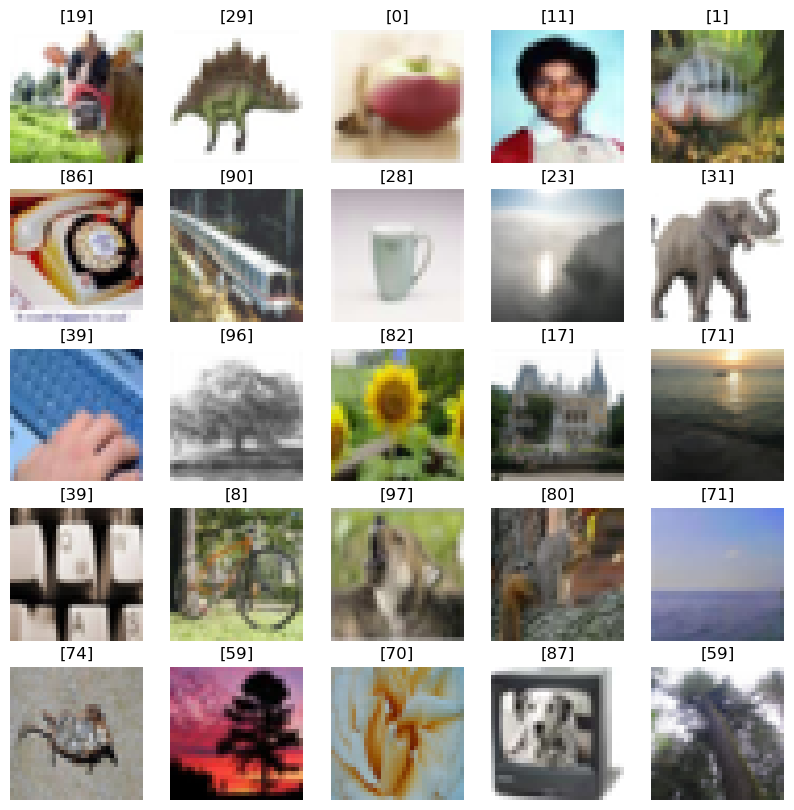

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

## Task A

### 1. Normalize the dataset with at least two type of normalization techniques.

#### Min-Max Normalization

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### Z-Score Normalization

In [4]:
mean = x_train.mean()
std = x_train.std()
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

### 2. Create a neural network architecture based auto encoder to classification of data. 

In [5]:
input_layer = Input(shape=(32, 32, 3))

In [6]:
encoder = Flatten()(input_layer)
encoder = Dense(128, activation='relu')(encoder)
encoder = Dense(64, activation='relu')(encoder)
encoded = Dense(32, activation='relu')(encoder)

In [7]:
decoder = Dense(64, activation='relu')(encoded)
decoder = Dense(128, activation='relu')(decoder)
decoder_output = Dense(3072, activation='sigmoid')(decoder)
decoder_output = Reshape((32, 32, 3))(decoder_output)

In [8]:
classification_output = Dense(100, activation='softmax')(encoded)

In [9]:
autoencoder = Model(inputs=input_layer, outputs=[decoder_output, classification_output])
autoencoder.compile(optimizer='adam', loss=['mean_squared_error', 'categorical_crossentropy'], loss_weights=[1.0, 1.0], metrics=['accuracy'])

In [10]:
autoencoder.fit(x_train, [x_train, tf.keras.utils.to_categorical(y_train, num_classes=100)], epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 14s 17ms/step - loss: 4.8964 - reshape_loss: 0.7925 - dense_6_loss: 4.1039 - reshape_accuracy: 0.5638 - dense_6_accuracy: 0.0836
Epoch 2/10
782/782 [==============================] - 13s 17ms/step - loss: 4.3683 - reshape_loss: 0.7173 - dense_6_loss: 3.6510 - reshape_accuracy: 0.6135 - dense_6_accuracy: 0.1466
Epoch 3/10
782/782 [==============================] - 13s 17ms/step - loss: 4.1880 - reshape_loss: 0.7073 - dense_6_loss: 3.4807 - reshape_accuracy: 0.6338 - dense_6_accuracy: 0.1727
Epoch 4/10
782/782 [==============================] - 13s 17ms/step - loss: 4.0648 - reshape_loss: 0.7031 - dense_6_loss: 3.3617 - reshape_accuracy: 0.6434 - dense_6_accuracy: 0.1943
Epoch 5/10
782/782 [==============================] - 13s 17ms/step - loss: 3.9733 - reshape_loss: 0.7015 - dense_6_loss: 3.2718 - reshape_accuracy: 0.6472 - dense_6_accuracy: 0.2084
Epoch 6/10
782/782 [==============================] - 13s 17ms/step - loss: 3.8972 - 

In [11]:
decoded_images, class_predictions = autoencoder.predict(x_test)

313/313 [==============================] - 2s 6ms/step


## Task B

### 1. Perform auto encoder where the encoder reduces the input data dimensions, and the decoder aims to reconstruct the original input.

In [12]:
input_shape = x_train[0].shape

In [13]:
input_layer = Input(shape=input_shape)
flatten_layer = Flatten()(input_layer)
encoder = Dense(128, activation='relu')(flatten_layer)
encoder = Dense(64, activation='relu')(encoder)
encoded = Dense(32, activation='relu')(encoder)

In [14]:
decoder = Dense(64, activation='relu')(encoded)
decoder = Dense(128, activation='relu')(decoder)
decoded = Dense(np.prod(input_shape), activation='sigmoid')(decoder)
decoded = Reshape(input_shape)(decoded)

In [15]:
autoencoder = Model(inputs=input_layer, outputs=decoded)

In [16]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

### 2. Apply Common activation functions include ReLU for hidden layers and sigmoid or softmax for the output layer of the decoder.

In [17]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=64, validation_data=(x_test, x_test))

Epoch 1/10
782/782 [==============================] - 14s 17ms/step - loss: 0.6926 - val_loss: 0.6495
Epoch 2/10
782/782 [==============================] - 12s 16ms/step - loss: 0.6325 - val_loss: 0.6318
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 0.6204 - val_loss: 0.6215
Epoch 4/10
782/782 [==============================] - 13s 17ms/step - loss: 0.6158 - val_loss: 0.6179
Epoch 5/10
782/782 [==============================] - 12s 16ms/step - loss: 0.6124 - val_loss: 0.6144
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.6099 - val_loss: 0.6133
Epoch 7/10
782/782 [==============================] - 13s 16ms/step - loss: 0.6089 - val_loss: 0.6129
Epoch 8/10
782/782 [==============================] - 12s 15ms/step - loss: 0.6080 - val_loss: 0.6121
Epoch 9/10
782/782 [==============================] - 13s 16ms/step - loss: 0.6074 - val_loss: 0.6120
Epoch 10/10
782/782 [==============================] - 12s 15ms/step - loss: 0.606

### 3. Create a neural network architecture based auto encoder to classification of data.

In [22]:
classification_head = Dense(100, activation='softmax')(encoded)
autoencoder_with_classification = Model(inputs=input_layer, outputs=classification_head)
autoencoder_with_classification.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=100)

In [24]:
autoencoder_with_classification.fit(x_train, y_train_onehot, epochs=10, batch_size=64, validation_data=(x_test, y_test_onehot))

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 4.9011 - accuracy: 0.0221 - val_loss: 4.4128 - val_accuracy: 0.0419
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 4.2041 - accuracy: 0.0616 - val_loss: 4.0553 - val_accuracy: 0.0825
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 3.9145 - accuracy: 0.1024 - val_loss: 3.8677 - val_accuracy: 0.1181
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 3.7229 - accuracy: 0.1317 - val_loss: 3.7185 - val_accuracy: 0.1412
Epoch 5/10
782/782 [==============================] - 7s 10ms/step - loss: 3.5731 - accuracy: 0.1555 - val_loss: 3.6411 - val_accuracy: 0.1534
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 3.4505 - accuracy: 0.1760 - val_loss: 3.5565 - val_accuracy: 0.1676
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 3.3517 - accuracy: 0.1911 - val_loss: 3.5450 - val_accuracy: 0.1698
Epoch

In [25]:
class_predictions = autoencoder_with_classification.predict(x_test)

313/313 [==============================] - 2s 6ms/step
